# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [1]:
import numpy as np
a = np.array([[1,2,3],[2,3,1]])
b = np.array([-1,4,3])
c = a @ b
c

array([16, 13])

# Resolución

Nota: En Filtrado.pdf (pag. 27) se expresa la forma de la matriz hermitica (AH) que se debe generar de acuerdo a un vector dado con las señales de entrada.
La señal de entrada se denomina ‘u’ y tiene ‘n’ coeficientes.
El objetivo es estimar cuál es el filtro que hace que los ‘n’ coeficientes de ‘u’ entreguen la mejor aproximación por un filtro lineal de nuestra señal deseada ‘d’ (que debemos conocer). Este filtro representa el caso general, filtro adaptativo, y en el TP1 vimos el filtro adaptado determinista que es un caso especial a partir de este. Cabe aclarar que este no es el filtro de winner porque para calcularlo necesito conocer la estadistica de la señal de entrada y la correlación cruzada con la señal deseada.

Por convenencia se define una matriz A hermitica que se arma con los N vectores de entrada que vamos teniendo en el primer vector que ya esta cargado en el filtro, que va desde el u(M) hasta el u(1).
Cuando pasa un instante, tenemos el segundo vector columna con u(M+1) hasta u(2).. el último va desde u(N) hasta (N-M).
La matriz A es su transpuesta.

Ejemplo:
Para el vector u = [3, 2, 1, -1]
Definiendo M = 2 (cantidad de taps del filtro)

La matriz correspondiente es la siguiente:

instante 1	instante 2<br/>
u2=2		u3=1<br/>
u1=3		u2=2<br/>

M establece la cantidad de filas de la matriz y la cantidad de columnas esta dada por: (Cantidad de muestras) - (cantidad de taps del filtro)

### 1) Encontrar la matriz de M por N de correlación los taps de entrada

In [2]:
u = [3, 2, 1, -1] # vector de ejemplo 
N = 4 # elementos del vector
M = 2 # cantidad de taps del filtro

matrizH = np.zeros((M, N-M))
for x in range(N-M):
    instante = u[x:M+x]
    matrizH[:,x] = instante[::-1]

#matrizH = matrizH.conjugate() # Al ser valores reales no hace falta conjugar los valores.
matrizH

array([[2., 1.],
       [3., 2.]])

In [3]:
#La matriz A es directamente la traspuesta.
matriz = matrizH.transpose()  

matriz

array([[2., 3.],
       [1., 2.]])

### 2) El vector de correlación cruzada  𝑀  por  1  entre los taps de entrada del predictor y la respuesta deseada  𝑢(𝑖)

In [4]:
d = np.array([ 3, 2 ]) # vector deseado de ejemplo
dh = d.transpose() 

# Nota: Los vectores se crean del tipo columna y no funciona la operación transpuesta.
# Para transponer el vector columna y hacerlo fila se realiza de la siguiente forma: dh = np.reshape(d,(1,2))

#El vector z es la matriz hermítica por el vector de la respuesta deseada
z = matrizH @ d
z

array([ 8., 13.])

### 3) El valor mínimo de  𝑒𝑓

In [5]:
#Existe un error de aproximación generado en la señal al analizarla y es blanco, afecta por igual, y es aditivo.

#El minimo error cuadratico medio entre la senial obtenida y la deseada esta determinado por la sig formula:
Emin = dh @ d  -  dh @ matriz @ ( np.linalg.inv(matrizH @ matriz) ) @ matrizH @ d
Emin

0.0

### 4) El vector de taps  𝑤̂ 

In [6]:
# El vector de taps esta determinado por la sig formula:
w = ( np.linalg.inv(matrizH @ matriz) ) @ ( matrizH @ d )
w

# Aplicando el filtro sería:
filtrada = matriz @ w
filtrada

array([3., 2.])

### 5) Calcular el filtro para  𝑁  valores de una realización de la señal 𝑢(𝑖)=𝑠𝑒𝑛(2𝜋𝜔0𝑖+𝜙0)+0.02𝑛(𝑖) siendo  𝜔0=3,𝜙0=𝜋/4  y  𝑛(𝑖)  un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4.

In [7]:
# 𝑢(𝑖) = 𝑠𝑒𝑛 ( 2 * 𝜋 * w0 * i + p0 ) + 0.02 n(i)
# siendo: w0 = 3, p0 = pi / 4 y n(i) gaussiano. N = 100, M = 4

w0 = 3
p0 = np.pi / 4
n1 = 100
M  = 4
i  = np.linspace(0.0, (n1-1)/n1, n1, endpoint=False)
u  = np.sin( 2 * np.pi * w0 * i + p0 )

import matplotlib.pyplot as plt

plt.figure( 1, (10,5) )
plt.title( 'Señal original')
plt.grid(which='both', axis='both')
plt.plot( i, u, color='b' )
plt.show()

np.random.seed(42) # Utilizo semilla para generar siempre el mismo ruido
ruido = np.random.normal(0, 0.02, n1) #Draw random samples from a normal (Gaussian) distribution.

signal = u + ruido

plt.figure( 2, (10,5) )
plt.title( 'Señal con ruido')
plt.grid(which='both', axis='both')
plt.plot( i, signal, color='r' )
plt.show()


<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

In [8]:
# Crear la matriz hermitica de M por N de correlación los taps de entrada

u_ori = u
u = signal # vector de la señal
N = u.size # elementos del vector
M = 4      # cantidad de taps del filtro

matrizH = np.zeros((M, N-M))
for x in range(N-M):
    instante = u[x:M+x]
    matrizH[:,x] = instante[::-1]

#matrizH

In [9]:
#La matriz A es directamente la traspuesta.
matriz = matrizH.transpose()  

#matriz

In [10]:
# El vector de correlación cruzada 𝑀 por 1 entre los taps de entrada del predictor y la respuesta deseada 𝑢(𝑖)

# Para generar el vector de la respuesta deseada puedo usar la señal sin ruido generada antes:
#d = u_ori[:M]    # Tomo los m primeros taps de la señal original
d = u_ori[M-1:-1] # Tomo los últimos M-1 taps de la señal original

dh = d.transpose()

#El vector z es la matriz hermítica por el vector de la respuesta deseada
z = matrizH @ d

z

array([48.10630524, 47.71169393, 45.64378557, 42.00201945])

In [11]:
#Existe un error de aproximación generado en la señal al analizarla y es blanco, afecta por igual, y es aditivo.
#El minimo error cuadratico medio entre la senial obtenida y la deseada esta determinado por la sig formula:

Emin = dh @ d  -  dh @ matriz @ ( np.linalg.inv(matrizH @ matriz) ) @ matrizH @ d

Emin

0.021486089483623516

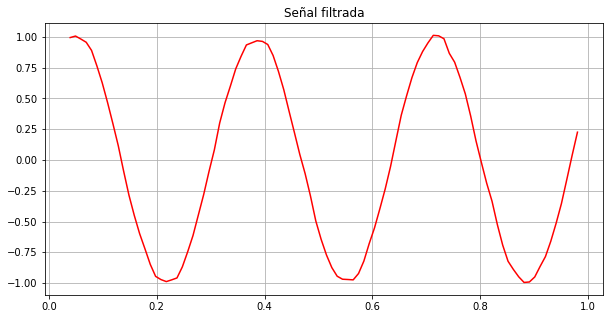

In [12]:
# El vector de taps esta determinado por la sig formula:
w = ( np.linalg.inv(matrizH @ matriz) ) @ ( matrizH @ d )

# Aplicando el filtro sería:
filtrada = matriz @ w
##filtrada

plt.figure( 3, (10,5) )
plt.title( 'Señal filtrada')
plt.grid(which='both', axis='both')
plt.plot( i[M:], filtrada, color='r' )
plt.show()

### 6) Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

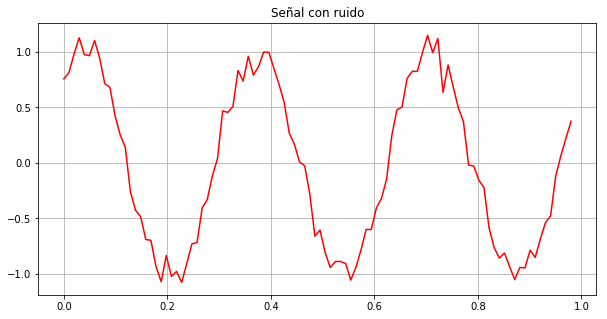

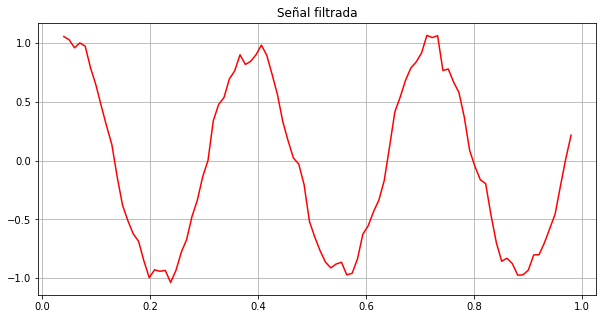

In [13]:
# Aumentando el nivel de ruido a la señal.

np.random.seed(42) # Utilizo semilla para generar siempre el mismo ruido
ruido = np.random.normal(0, 0.1, n1)
signal = u_ori + ruido

plt.figure( 2, (10,5) )
plt.title( 'Señal con ruido')
plt.grid(which='both', axis='both')
plt.plot( i, signal, color='r' )
plt.show()

u = signal # vector de la señal
N = u.size # elementos del vector
M = 4      # cantidad de taps del filtro

# Crear la matriz hermitica de M por N de correlación los taps de entrada
matrizH = np.zeros((M, N-M))
for x in range(N-M):
    instante = u[x:M+x]
    matrizH[:,x] = instante[::-1]

#La matriz A es directamente la traspuesta.
matriz = matrizH.transpose()  

# El vector de correlación cruzada 𝑀 por 1 entre los taps de entrada del predictor y la respuesta deseada 𝑢(𝑖)
d = u_ori[M-1:-1] # Tomo los últimos M-1 taps de la señal original
dh = d.transpose()

#El vector z es la matriz hermítica por el vector de la respuesta deseada
z = matrizH @ d

#Calcular el minimo error cuadratico medio entre la senial obtenida y la deseada
Emin = dh @ d  -  dh @ matriz @ ( np.linalg.inv(matrizH @ matriz) ) @ matrizH @ d

# El vector de taps esta determinado por la sig formula:
w = ( np.linalg.inv(matrizH @ matriz) ) @ ( matrizH @ d )

# Aplicando el filtro sería:
filtrada = matriz @ w

plt.figure( 3, (10,5) )
plt.title( 'Señal filtrada')
plt.grid(which='both', axis='both')
plt.plot( i[M:], filtrada, color='r' )
plt.show()


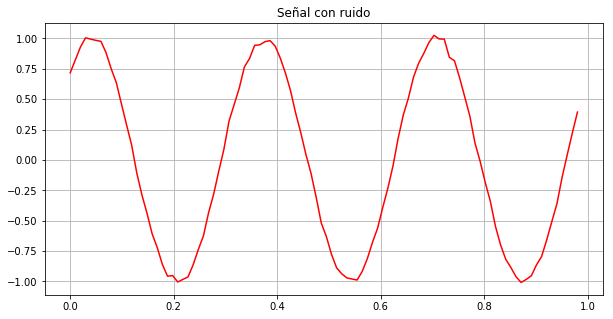

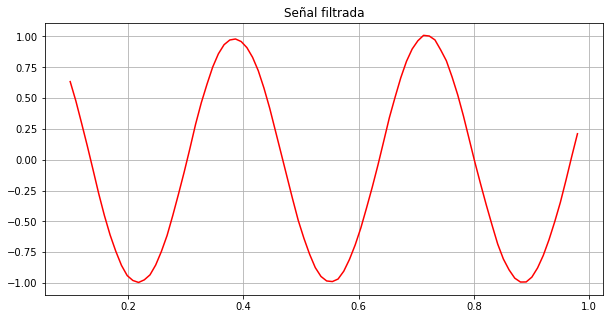

In [14]:
# Aumentando la cantidad de taps.

np.random.seed(42) # Utilizo semilla para generar siempre el mismo ruido
ruido = np.random.normal(0, 0.02, n1)
signal = u_ori + ruido

plt.figure( 2, (10,5) )
plt.title( 'Señal con ruido')
plt.grid(which='both', axis='both')
plt.plot( i, signal, color='r' )
plt.show()

u = signal # vector de la señal
N = u.size # elementos del vector
M = 10     # cantidad de taps del filtro

# Crear la matriz hermitica de M por N de correlación los taps de entrada
matrizH = np.zeros((M, N-M))
for x in range(N-M):
    instante = u[x:M+x]
    matrizH[:,x] = instante[::-1]

#La matriz A es directamente la traspuesta.
matriz = matrizH.transpose()  

# El vector de correlación cruzada 𝑀 por 1 entre los taps de entrada del predictor y la respuesta deseada 𝑢(𝑖)
d = u_ori[M-1:-1] # Tomo los últimos M-1 taps de la señal original
dh = d.transpose()

#El vector z es la matriz hermítica por el vector de la respuesta deseada
z = matrizH @ d

#Calcular el minimo error cuadratico medio entre la senial obtenida y la deseada
Emin = dh @ d  -  dh @ matriz @ ( np.linalg.inv(matrizH @ matriz) ) @ matrizH @ d

# El vector de taps esta determinado por la sig formula:
w = ( np.linalg.inv(matrizH @ matriz) ) @ ( matrizH @ d )

# Aplicando el filtro sería:
filtrada = matriz @ w

plt.figure( 3, (10,5) )
plt.title( 'Señal filtrada')
plt.grid(which='both', axis='both')
plt.plot( i[M:], filtrada, color='r' )
plt.show()


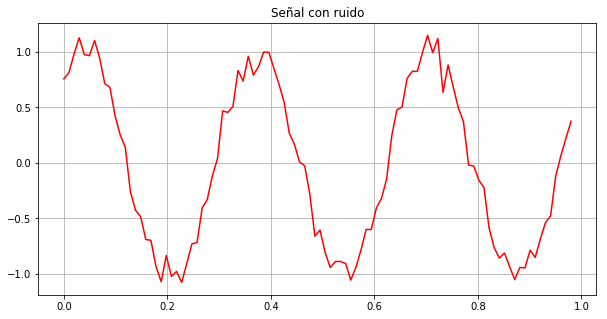

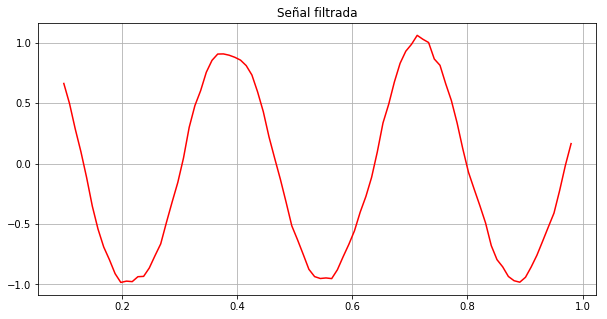

In [15]:
# Aumentando el nivel de ruido y la cantidad de taps a la señal.

np.random.seed(42) # Utilizo semilla para generar siempre el mismo ruido
ruido = np.random.normal(0, 0.1, n1)
signal = u_ori + ruido

plt.figure( 2, (10,5) )
plt.title( 'Señal con ruido')
plt.grid(which='both', axis='both')
plt.plot( i, signal, color='r' )
plt.show()

u = signal # vector de la señal
N = u.size # elementos del vector
M = 10     # cantidad de taps del filtro

# Crear la matriz hermitica de M por N de correlación los taps de entrada
matrizH = np.zeros((M, N-M))
for x in range(N-M):
    instante = u[x:M+x]
    matrizH[:,x] = instante[::-1]

#La matriz A es directamente la traspuesta.
matriz = matrizH.transpose()  

# El vector de correlación cruzada 𝑀 por 1 entre los taps de entrada del predictor y la respuesta deseada 𝑢(𝑖)
d = u_ori[M-1:-1] # Tomo los últimos M-1 taps de la señal original
dh = d.transpose()

#El vector z es la matriz hermítica por el vector de la respuesta deseada
z = matrizH @ d

#Calcular el minimo error cuadratico medio entre la senial obtenida y la deseada
Emin = dh @ d  -  dh @ matriz @ ( np.linalg.inv(matrizH @ matriz) ) @ matrizH @ d

# El vector de taps esta determinado por la sig formula:
w = ( np.linalg.inv(matrizH @ matriz) ) @ ( matrizH @ d )

# Aplicando el filtro sería:
filtrada = matriz @ w

plt.figure( 3, (10,5) )
plt.title( 'Señal filtrada')
plt.grid(which='both', axis='both')
plt.plot( i[M:], filtrada, color='r' )
plt.show()


# Observaciones

Se observa notablemente un mejor filtro al incrementar la cantidad de taps (por supuesto que esto conllevara mas hardware en su aplicación).